# Optical flow and depth estimation for Bokeh effect generation
#### ***Written by Juan Bernardo Gómez Mendoza***
***Universidad Nacional de Colombia, Sede Manizales***
***Updated on Wednesday, october 5, 2022.***


This notebook illustrates the use of optical flow in assisted synthetic Bokeh generation. In order to have flow (depth) information in the entire image, a global flow estimation technique is used.


---
## Optical flow estimation

$$I(x,y,t) = I(x+\Delta x, y+\Delta y, t + \Delta t)$$

$$I(x+\Delta x, y+\Delta y, t + \Delta t) \approx I(x,y,t) + \dfrac{\partial I}{\partial x}\Delta x + \dfrac{\partial I}{\partial y}\Delta y + \dfrac{\partial I}{\partial t}\Delta t$$

$$\dfrac{\partial I}{\partial x}u + \dfrac{\partial I}{\partial y}v + \dfrac{\partial I}{\partial t} = 0$$

$$\nabla I \cdot \vec{V} = -\dfrac{\partial I}{\partial t}$$

---
## Notebook priors

This example uses the following libraries/imports:

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


---
## Image loading

In the experiment, I use selected stereo images from [https://wppa.nl/nl/docs-by-subject/stereo-images/](https://wppa.nl/nl/docs-by-subject/stereo-images/). The images are built as left/right pairs merged together horizontally. Therefore, the resulting image is rows x 2*cols in size.

(-0.5, 959.5, 935.5, -0.5)

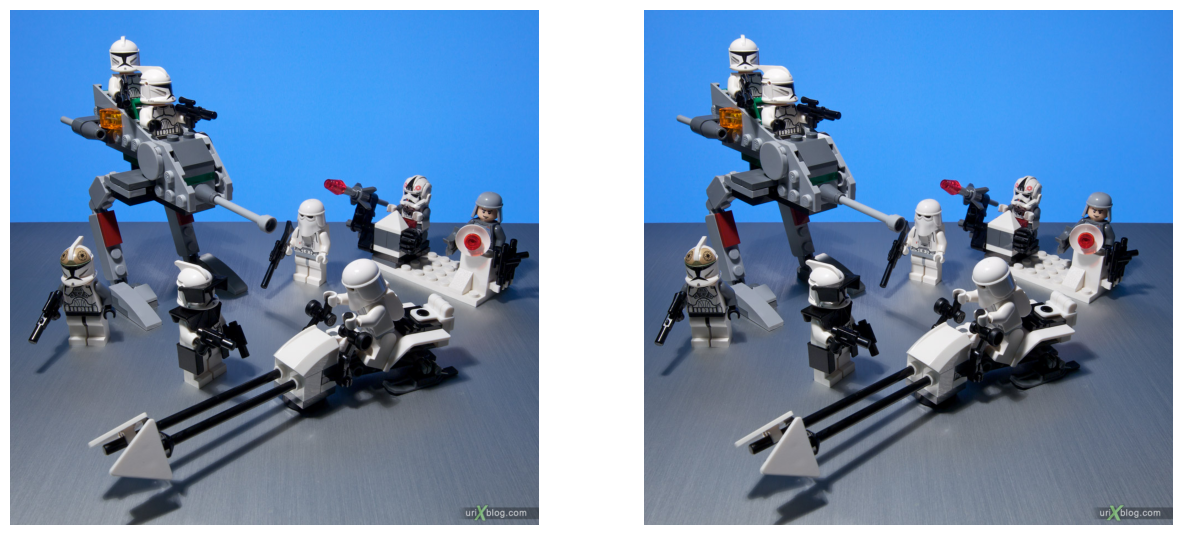

In [5]:
im = cv2.cvtColor(cv2.imread('s-rl.jpg'), cv2.COLOR_BGR2RGB)
rows = im.shape[0]
col2 = int(im.shape[1]/2)
depth = im.shape[2]
iml = im[:, :col2,:]
imr = im[:, col2:, :]
plt.figure(figsize=[15, 14])
plt.subplot(121)
plt.imshow(iml)
plt.axis('off')
plt.subplot(122)
plt.imshow(imr)
plt.axis('off')

---
# Depth estimation using Stereo Block Matching (StereoBM)

The stereo block matching algorithm assumes that the corresponding pixels in the left and right images are found along a scanline, hence sharing the same Y coordinate. Since more than one pixel may match the intensity of the source pixel, the algorithm tries to find the best match to a block centered in such pixel along the scanline in the second image. For more information please refer to the OpenCV documentation, or check the page in [this link](https://learnopencv.com/depth-perception-using-stereo-camera-python-c/).

In order to use the OpenCV StereoBM::compute, both left and right images should be transformed into 8 bit unsigned with only one plane depth.

(-0.5, 959.5, 935.5, -0.5)

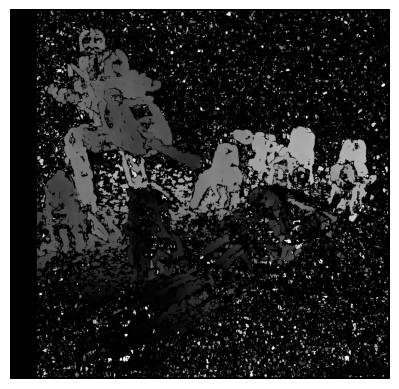

In [6]:
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=11)
disparity = stereo.compute(cv2.cvtColor(iml, cv2.COLOR_RGB2GRAY), \
                           cv2.cvtColor(imr, cv2.COLOR_RGB2GRAY))
plt.imshow(disparity, 'gray')
plt.axis('off')

---
## Global optical flow calculation using the [Farnebäck method](https://www.diva-portal.org/smash/get/diva2:273847/FULLTEXT01.pdf)



(-0.5, 959.5, 935.5, -0.5)

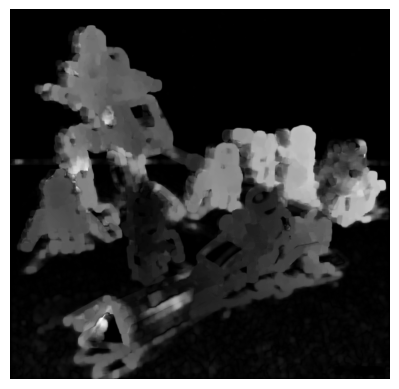

In [7]:
flow = cv2.calcOpticalFlowFarneback(cv2.cvtColor(iml, cv2.COLOR_RGB2GRAY), \
                               cv2.cvtColor(imr, cv2.COLOR_RGB2GRAY), flow=None, \
                               pyr_scale=0.5, levels=3, iterations=15, winsize=11, \
                               poly_n=5, poly_sigma=1, flags=0)
magflow = np.sqrt(np.sum(flow*flow, axis=2))
plt.imshow(magflow, 'gray')
plt.axis('off')